In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rc('font', size=28)                  # controls default text sizes
plt.rc('axes', titlesize=28)             # fontsize of the axes title
plt.rc('axes', labelsize=28)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=28)            # fontsize of the tick labels
plt.rc('ytick', labelsize=28)            # fontsize of the tick labels
plt.rc('legend', fontsize=28)            # legend fontsize
plt.rc('figure', titlesize=28)           # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['ytick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3


def findpath(mol,basis,func,cosmo=False,deut=False,lomi=None):
    datafolder = '/home/julia/testsystems'
    if cosmo and deut:
        path = os.path.join(datafolder,mol,basis,func+'_cosmo_deut')
    elif cosmo:
        path = os.path.join(datafolder,mol,basis,func+'_cosmo')
    elif deut:
        path = os.path.join(datafolder,mol,basis,func+'_deut')
    else:
        path = os.path.join(datafolder,mol,basis,func)
    
    if lomi:
        path = path+'_'+str(lomi)
        
    return path
    
    
def loaddata(path):
    harm_freq = np.loadtxt(os.path.join(path,'freqs.txt'))
    harm_ints = np.loadtxt(os.path.join(path,'inten.txt'))
    anharm_freq = np.load(os.path.join(path,'results_VCI_exciton/VCI_frequencies.npy'))
    anharm_ints = np.load(os.path.join(path,'results_VCI_exciton/VCI_intensities.npy'))
    return harm_freq, harm_ints, anharm_freq, anharm_ints

def gauss(x,freqsu,intsu):
    y = intsu*np.exp(-0.01*(x-freqsu)**2)
    #y = 1 / ( (x**2 - freq**2)**2 + (gamma**2 * freq**2) )
    return y

def spektrum(xmin,xmax,steps,freqsu,intsu):
    
    x = np.linspace(xmin,xmax,steps)
    y = np.zeros(steps)
    
    for j in range(len(freqsu)):
        ys = []
        for i in range(steps):
            ys.append(gauss(x[i],freqsu[j],intsu[j]))
            y[i] = y[i] + ys[i]
    return x,y

def loaddata_calc(path,xmin,xmax,steps):
    harm_freq, harm_ints, anharm_freq, anharm_ints = loaddata(path)
    x_h, y_h = spektrum(xmin,xmax,steps,harm_freq,harm_ints)
    x_a, y_a = spektrum(xmin,xmax,steps,anharm_freq[0],anharm_ints[0])
    return x_h, y_h, x_a, y_a

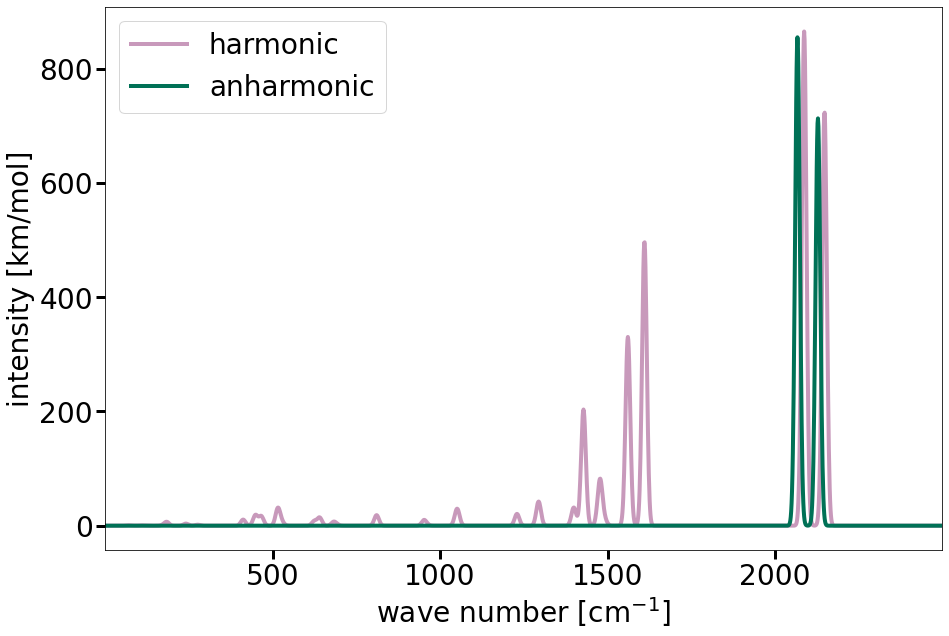

In [6]:
axmax = 2499
axmin = 1
steps = 2000

path = findpath('DAR','def2-TZVP','b3-lyp',cosmo=True,deut=True,lomi=None)
x_h, y_h, x_a, y_a = loaddata_calc(path,axmin,axmax,steps)

plt.figure(figsize=(15,10))
plt.plot(x_h,y_h, color='#c899bb', label='harmonic')
plt.plot(x_a,y_a, color='#007156', label='anharmonic')
plt.ylabel(r'intensity [km/mol]')
plt.xlabel(r'wave number [cm$^{-1}$]')
plt.xlim(axmin,axmax)
plt.legend()


plt.savefig('DAR_1DIR.png',bbox_inches='tight')